In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import done')

Import done


In [ ]:
# Link to the CSV file

url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
df = pd.read_csv(url)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Calculate the mean of each numerical column
mean_income = df['Income'].mean()
mean_steps = df['Miles'].mean()
mean_age = df['Age'].mean()
mean_usage = df['Usage'].mean()
mean_fitness = df['Fitness'].mean()
mean_education = df['Education'].mean()

# Print the results
print("Mean Income:", mean_income)
print("Mean Steps Walked (Miles):", mean_steps)
print("Mean Age:", mean_age)
print("Mean Usage:", mean_usage)
print("Mean Fitness:", mean_fitness)
print("Mean Education:", mean_education)

Mean Income: 53719.57777777778
Mean Steps Walked (Miles): 103.19444444444444
Mean Age: 28.788888888888888
Mean Usage: 3.4555555555555557
Mean Fitness: 3.311111111111111
Mean Education: 15.572222222222223


# Observations After looking at the Dataset and calculating Mean

---
1. Mean Income: 53,719 USD
2. Mean Steps Walked (Miles): 103
3. Mean Age: 28.7 years
4. Mean Usage: 3.4 per week
5. Mean Fitness: 3.3/5.0
6. Mean Education: 15.6 years


# Checking for Missing Values and Outliers

Missing Values:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


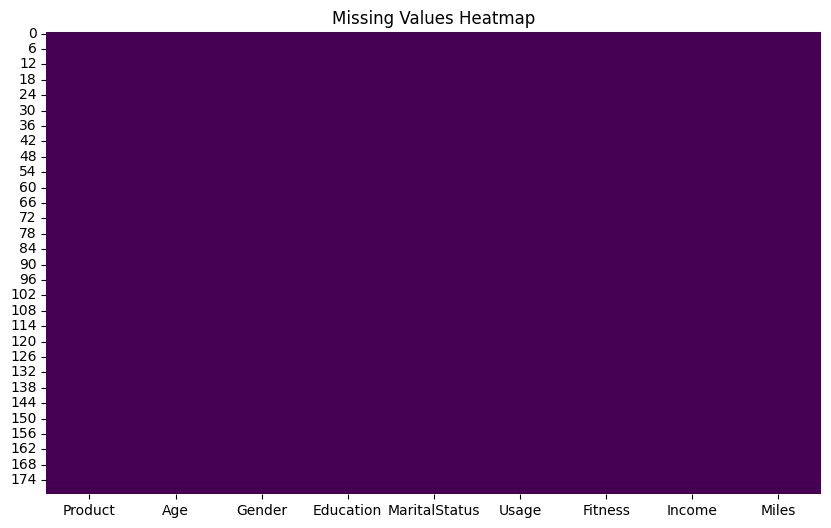

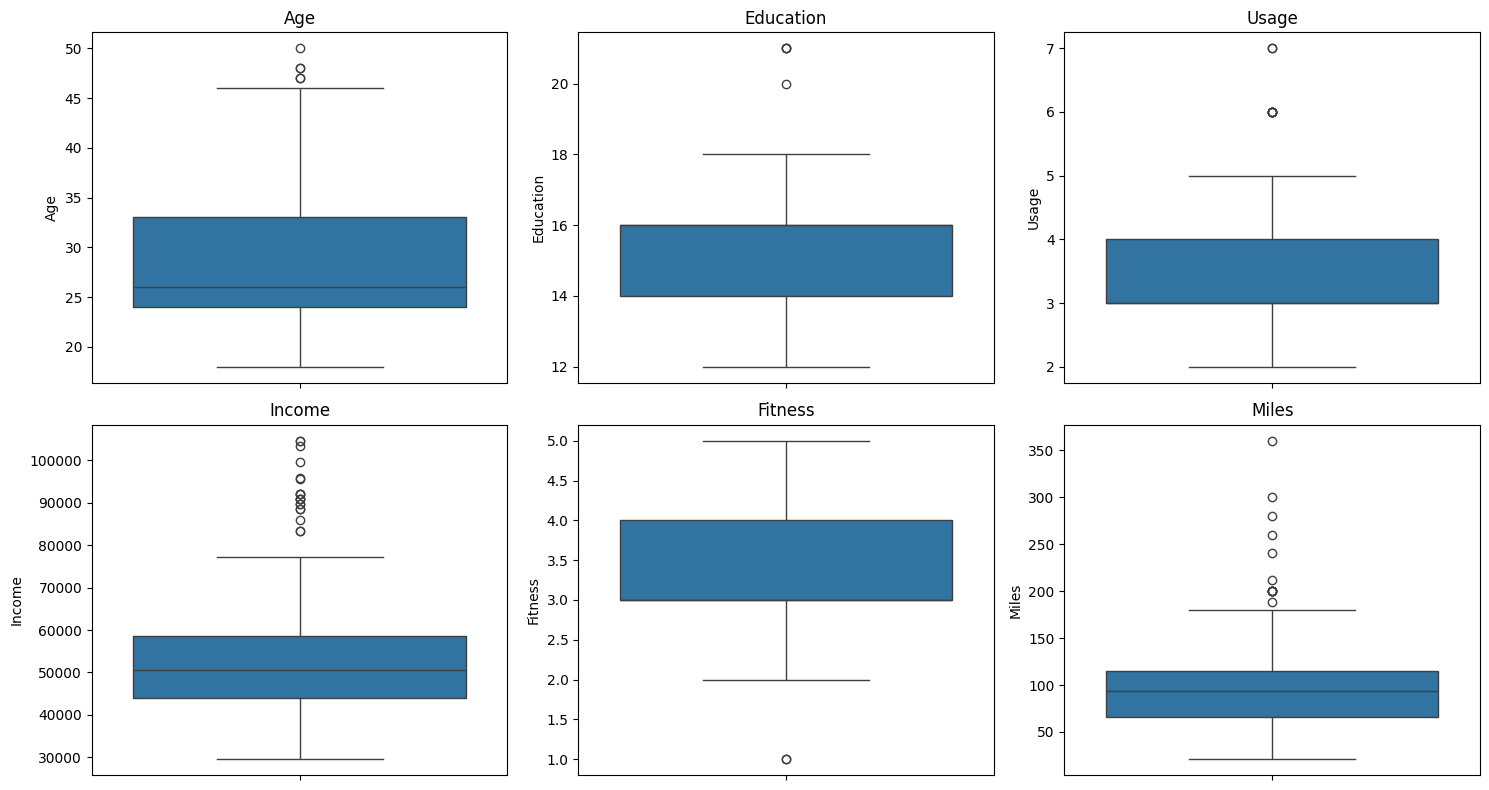

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Detecting outlier for continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

plt.figure(figsize=(15, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Distrubution of products among Different Age Groups(Bar Plot)

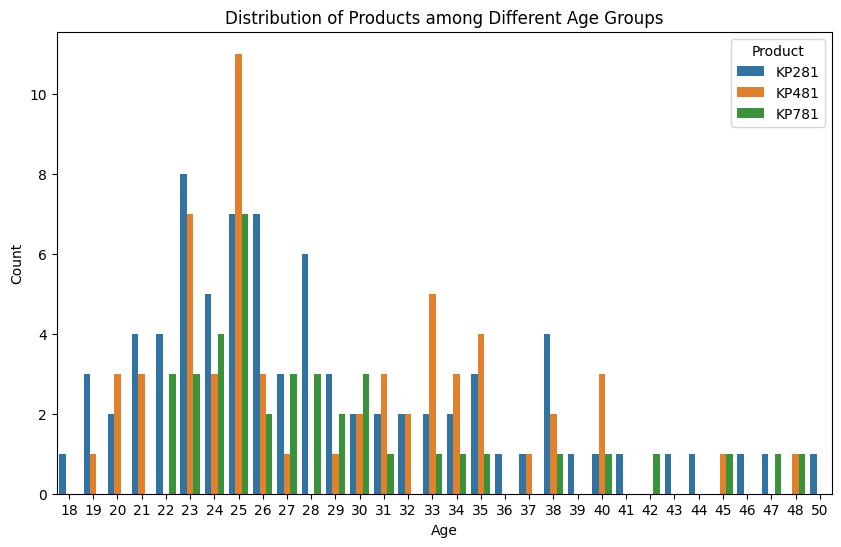

In [ ]:
# Distrubution of products among Different Age Groups(Bar Plot)

plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Age', hue = 'Product')
plt.title('Distribution of Products among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()

# No.of Unique Products in the Dataset

In [ ]:
df['Product'].unique()

# Therefore, there are 3 unique products in the DataFrame

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# BoxPlot(Pair Plot) and the Difference in Mean and Median for each column

---



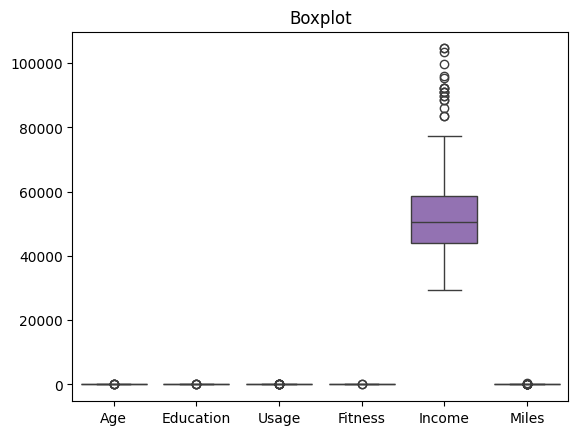

Difference between the MEAN and MEDIAN : 
Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64


In [ ]:
# BoxPlot(Pair Plot to check correlation among different factors)
sns.boxplot(data = df)
plt.title('Boxplot')
plt.show()

# Difference between MEAN and MEDIAN for each numerical column
summary_stats = df.describe()

difference = summary_stats.loc['mean'] - summary_stats.loc['50%']
print("Difference between the MEAN and MEDIAN : ")
print(difference)

# Heat Map to check correlation among different factors

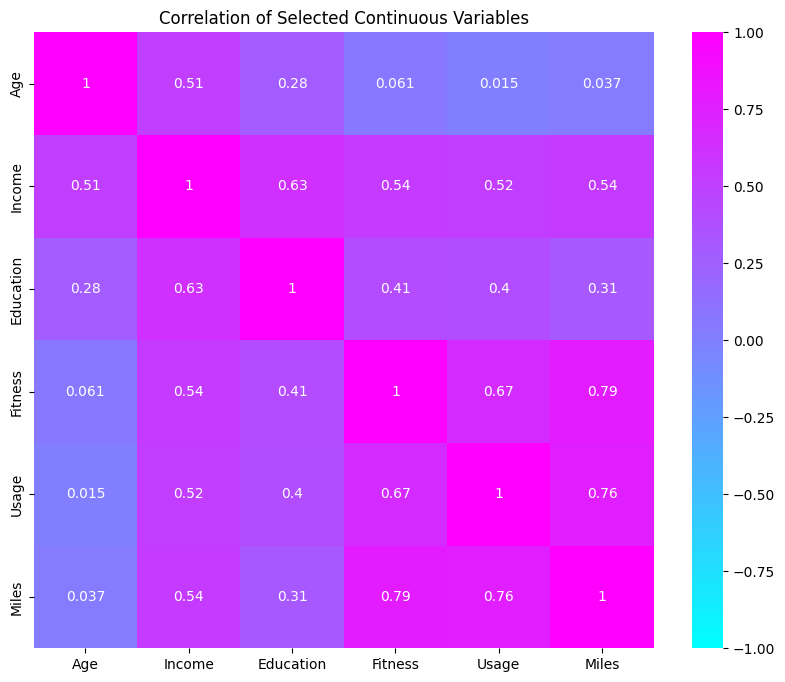

In [ ]:
continuous_columns = ["Age", "Income", "Education", "Fitness", "Usage",  "Miles"]

# Calculating correlation matrix
correlation_matrix = df[continuous_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'cool', vmin = -1, vmax = 1)
plt.title("Correlation of Selected Continuous Variables")
plt.show()

# vmin and vmax are used to set the MINIMUM and MAXIMUM values of the color scale

# Individual Bar Plots for each product

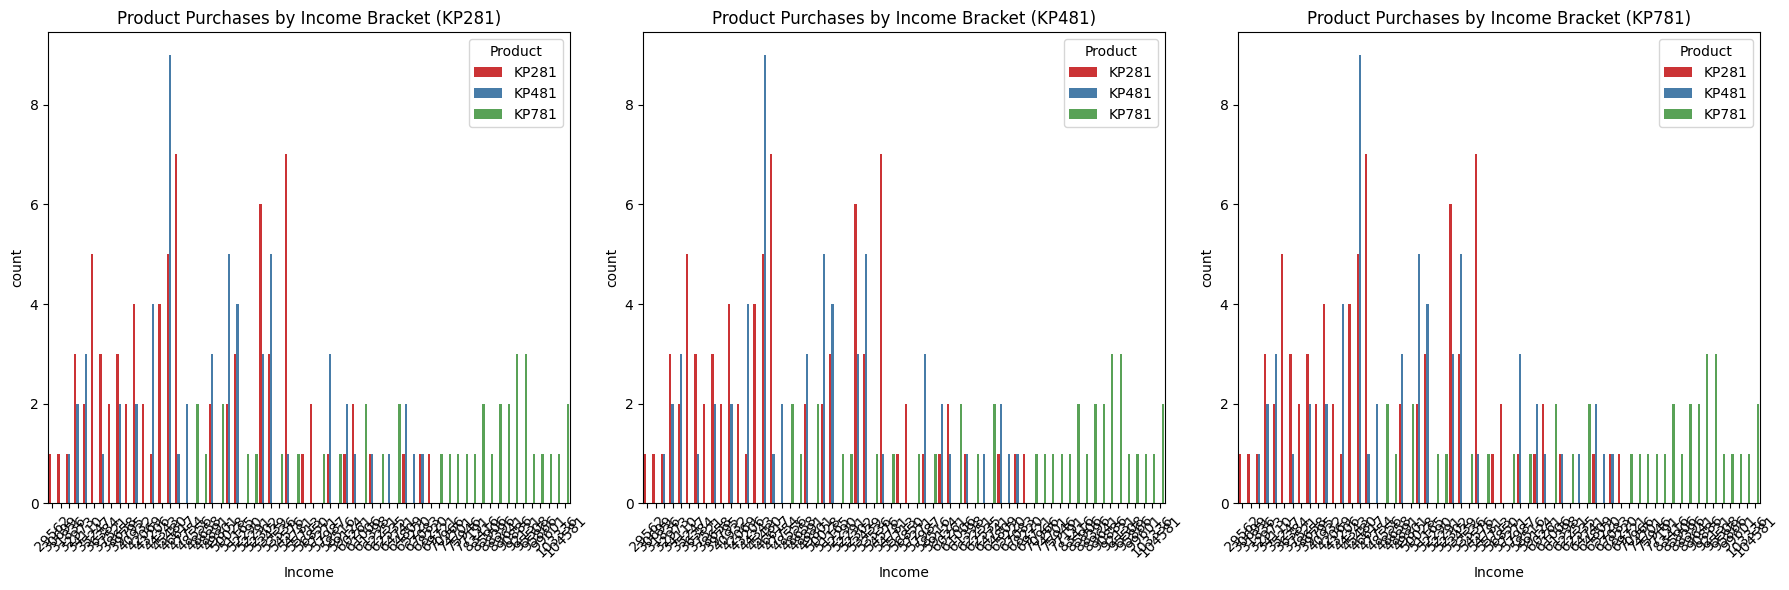

In [ ]:
# Individual Bar Plots for each product
plt.figure(figsize=(18, 6))

# Bar Plot for KP281
plt.subplot(1, 3, 1)
sns.countplot(data = df, x = 'Income', hue = 'Product', palette = 'Set1')
plt.title('Product Purchases by Income Bracket (KP281)')
plt.xticks(rotation=45)

# Bar Plot for KP481
plt.subplot(1, 3, 2)
sns.countplot(data = df, x = 'Income', hue = 'Product', palette = 'Set1')
plt.title('Product Purchases by Income Bracket (KP481)')
plt.xticks(rotation=45)

# Bar Plot for KP781
plt.subplot(1, 3, 3)
sns.countplot(data = df, x = 'Income', hue = 'Product', palette = 'Set1')
plt.title('Product Purchases by Income Bracket (KP781)')
plt.xticks(rotation=45)

# Display
plt.tight_layout()
plt.show()

# BoxPlot for Age

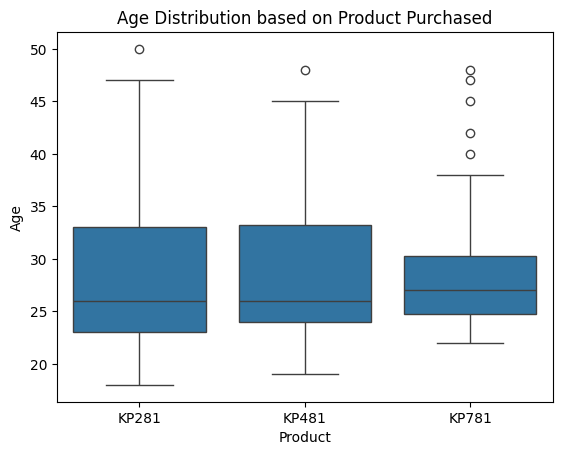

In [ ]:
# BoxPlot for Age

sns.boxplot(x = 'Product', y = 'Age', data = df)
plt.title('Age Distribution based on Product Purchased')
plt.show()

# Income-Product Plot

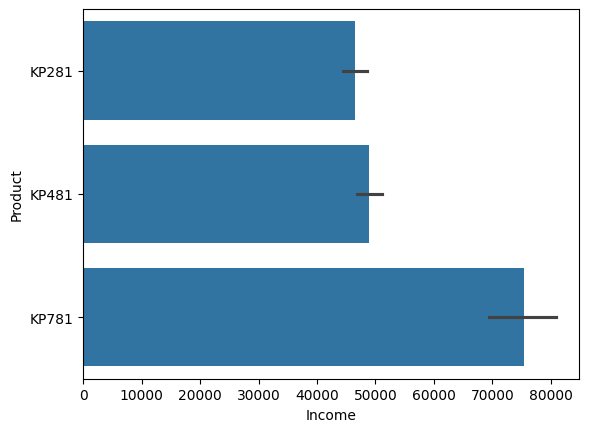

In [ ]:
# Different Plots


# 1.) Income-Product Plot
sns.barplot(data = df, x='Income', y='Product')
plt.show()

# Product-Gender

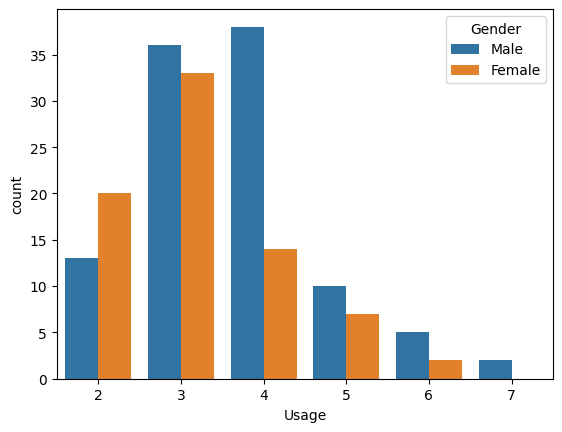

In [ ]:
# 2.) Product-Gender Plot
sns.countplot(data = df, x = 'Usage', hue = 'Gender')
plt.show()

# Usage-Age Plot

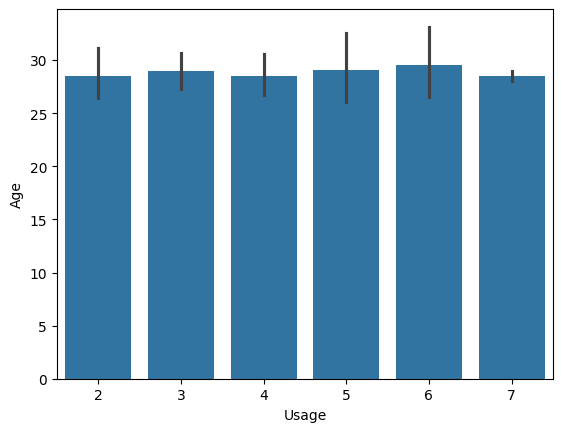

In [ ]:
# 3.) Usage-Age Plot
sns.barplot(data = df, x = 'Usage', y = 'Age')
plt.show()

# Usage-Fitness Plot

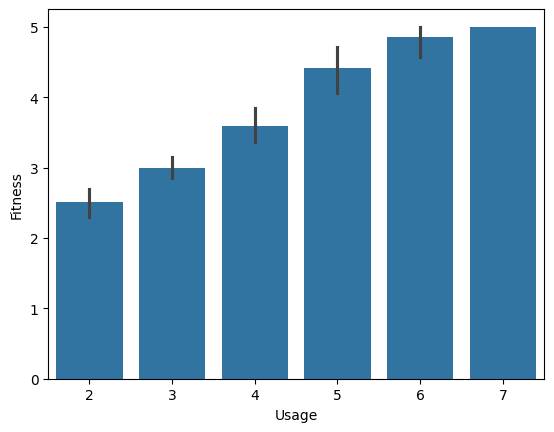

In [ ]:
# 4.) Usage-Fitness Plot
sns.barplot(data = df, x = 'Usage', y = 'Fitness')
plt.show()

# Product-Fitness Plot

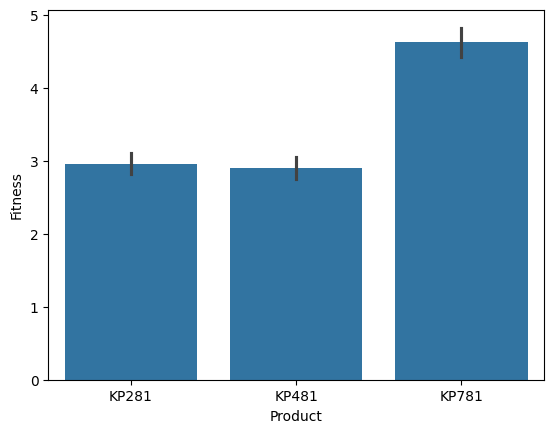

In [ ]:
# 5.) Product-Fitness Plot
sns.barplot(data = df, x = 'Product', y = 'Fitness')
plt.show()

# Usage-Fitness Scatter Plot

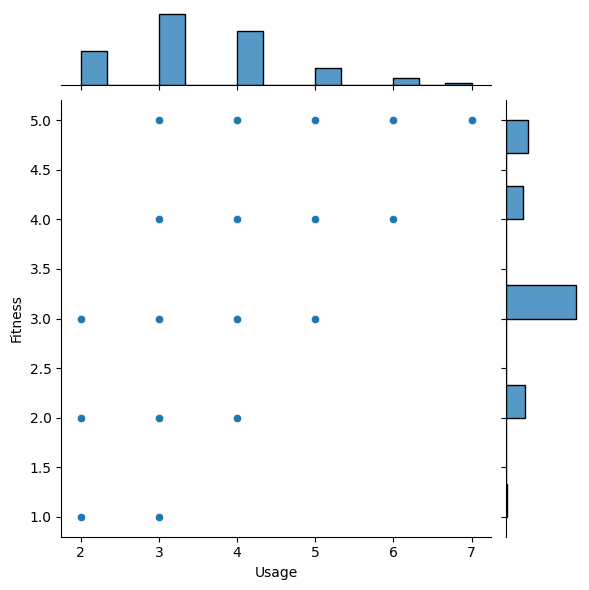

In [ ]:
# 6.) Usage-Fitness Scatter Plot
sns.jointplot(data = df, x = 'Usage', y = 'Fitness', kind = 'scatter')
plt.show()

# HistPlots for different types of Products(Treadmills - KP218, KP418, KP718)

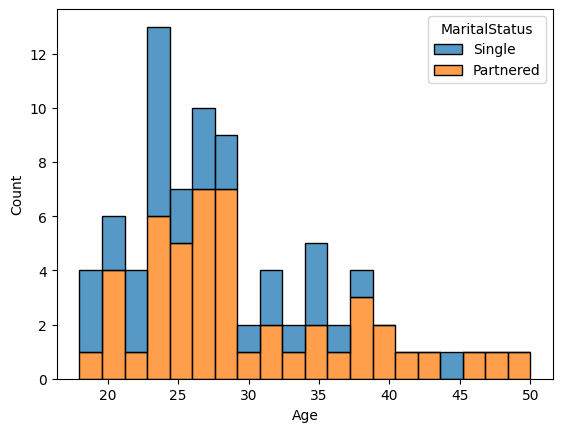

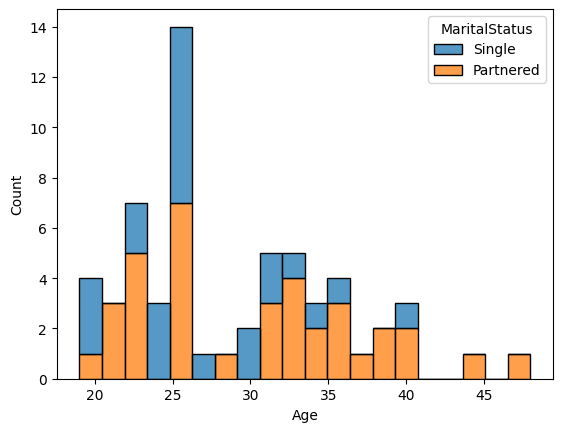

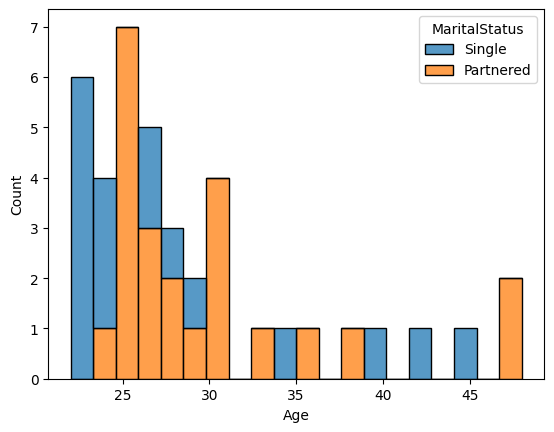

In [ ]:
# HistPlots for different Treadmills

# KP-281
sns.histplot(data = df[df['Product'] == 'KP281'], x = 'Age', hue = 'MaritalStatus', multiple = 'stack', bins=20)
plt.show()

# KP-481
sns.histplot(data = df[df['Product'] == 'KP481'], x = 'Age', hue = 'MaritalStatus', multiple = 'stack', bins=20)
plt.show()

# KP-781
sns.histplot(data = df[df['Product'] == 'KP781'], x = 'Age', hue = 'MaritalStatus', multiple = 'stack', bins=20)
plt.show()

# 2-Way Contingency Table

In [ ]:
# 2-Way Contingency Table
genderProduct_table = pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

print("2-Way Contingency Gender-Product Table :")
print()
print(genderProduct_table)

2-Way Contingency Gender-Product Table :

Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180


# Marginal Probabilities

In [ ]:
# Marginal Probabilities(using pandas.crosstab)

marginal_probability = pd.crosstab(index=df['Product'], columns='Count(in %)', normalize=True) * 100

print("Marginal Probability of Each Product :")
print()
print(marginal_probability)

Marginal Probability of Each Product :

col_0    Count(in %)
Product             
KP281      44.444444
KP481      33.333333
KP781      22.222222


# Probability of a Male customer buying a KP-718 Treadmill

In [ ]:
# Finding the probability of a male customer buying a KP718 Treadmill


# No.of Male customers who bought the KP781 Treadmills
male_kp781_count = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0]
print("No.of Males who bought KP781 Treadmill :", male_kp781_count)

# Total No.of Male customers who bought ANY Treadmills
total_male_count = df[df['Gender'] == 'Male'].shape[0]
print("Total No.of Males :", total_male_count)

# Probability of a male customer buying a KP781 treadmill
probability_male_kp781 = male_kp781_count / total_male_count
probability_male_kp781 = probability_male_kp781 * 100 # In Percentage
print()

print("Probability(in %) of a Male customer buying a KP781 Treadmill:", probability_male_kp781, "%")

No.of Males who bought KP781 Treadmill : 33
Total No.of Males : 104

Probability(in %) of a Male customer buying a KP781 Treadmill: 31.73076923076923 %


# Non-Graphical Analysis

In [ ]:
# Non-Graphical Analysis
# Iterates over all columns and prints all unique values and lists them

for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("Unique values:", df[col].unique())
    print()

# Unique values and value counts for each column
unique_values_counts = {col: {'unique_values': df[col].unique(), 'value_counts': df[col].value_counts()} for col in df.columns}
print("Unique Values and Value Counts for Each Column:")
print(unique_values_counts)

Column: Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
Unique values: ['KP281' 'KP481' 'KP781']

Column: Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
Unique values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Column: Gender
Male      104
Female     76
Name: Gender, dtype: int64
Unique values: ['Male' 'Female']

Column: Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
Unique values: [14 15 12 13 16 18 20 21]

Column: MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
Unique values: ['Single' 'Partnered']

Column: Usage
3    69
4    52
2    33
5    1

# **General Comments/Observations**

## Range of Attributes:

1. Has different attributes like age, gender, income, education, usage(per week), marital status, etc.
2. Age ranges from 18 to 48 yrs
3. Education ranges from 12 to 21 yrs
4. Usage(per week) ranges from 2 to 6
6. Income(in USD) ranges from 29,562 to 104,581
7. Fitness(level on a scale of 5) ranges from 2 to 5
8. No.of miles(per week) ranges from 47 to 200


## Distribution of Variables and Relationships:

1. There's a wide distribution across age, education and income ranges
2. There's direct correlation between income and no.of miles run per week.Greater the income, the more no.of miles were run in a week. Thus, it can be said that the wealthy focus a lot on physical health
3. Gender distribution is relatively balanced
4. Different people prefer different products

# **Recommendations**

**- KP218**
1. Target both genders equally.
2. Prioritize customers who use the product 3 days/week.
3. Focus on Partnered customers.
4. Target customers with 16 years of education.


**- KP418**
1. Target both genders equally.
2. Prioritize customers with 14-16 years of education.
3. Focus on Partnered customers.
4. Target customers with 16 years of education.


**- KP718**
1. Focus on male customers.
2. Target customers with 18 years of education.
3. Prioritize customers who use the product 4 days/week.
4. Focus on Partnered customers.
